# Analisis Debat Cawapres 22 Desember 2023
Oleh Dwi Putra Satria Utama | dwiputra3500@gmail.com


# Metodelogi

| No| Project               | Keywords | Pengambilan Data |Jumlah Data|
|---|-----------------------|----------|------------------|-----------|
| 1 | Muhaimin Iskandar     | Imin | 23 Desember 2023 |6771|
| 2 | Gibran Rakabuming Raka| Gibran  | 23 Desember 2023 |6842|
| 3 | Mahfud MD             | Mahfud   | 23 Desember 2023 |4588|



# Data loading

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_imin = pd.read_csv('cak-imin.csv', delimiter=';')
df_gibran = pd.read_csv('gibran.csv', delimiter=';')
df_mahfud = pd.read_csv('mahfud.csv', delimiter=';')

# Cek data

In [2]:
# cek tipe data
df_imin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6805 entries, 0 to 6804
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           6805 non-null   object
 1   id_str               6805 non-null   int64 
 2   full_text            6805 non-null   object
 3   quote_count          6805 non-null   int64 
 4   reply_count          6805 non-null   int64 
 5   retweet_count        6805 non-null   int64 
 6   favorite_count       6805 non-null   int64 
 7   lang                 6805 non-null   object
 8   user_id_str          6805 non-null   int64 
 9   conversation_id_str  6805 non-null   int64 
 10  username             6805 non-null   object
 11  tweet_url            6805 non-null   object
dtypes: int64(7), object(5)
memory usage: 638.1+ KB


In [3]:
# merubah tipe data created_at menjadi datetime
def ubah_ke_datetime(df):
    df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
    return df

df_imin = ubah_ke_datetime(df_imin)
df_gibran = ubah_ke_datetime(df_gibran)
df_mahfud = ubah_ke_datetime(df_mahfud)

In [4]:
#cek duplikasi data
duplikat_imin=df_imin.duplicated().sum()
duplikat_gibran=df_gibran.duplicated().sum()
duplikat_mahfud=df_mahfud.duplicated().sum()

print('imin:', duplikat_imin)
print('gibran:', duplikat_gibran)
print('mahfud:', duplikat_mahfud)

imin: 0
gibran: 0
mahfud: 0


In [5]:
#cek missing value
missing_imin=df_imin.isnull().sum()
missing_gibran=df_gibran.isnull().sum()
missing_mahfud=df_mahfud.isnull().sum()

print('imin:', missing_imin)
print('gibran:', missing_gibran)
print('mahfud:', missing_mahfud)

imin: created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64
gibran: created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64
mahfud: created_at             0
id_str                 0
full_text              0
quote_count            0
reply_count            0
retweet_count          0
favorite_count         0
lang                   0
user_id_str            0
conversation_id_str    0
username               0
tweet_url              0
dtype: int64


# Copy data

In [6]:
df_imin_copy = df_imin.copy()
df_gibran_copy = df_gibran.copy()
df_mahfud_copy = df_mahfud.copy()

# Prepocessing

Preprocessing steps :

1. Convert text to lowercase.
2. Remove punctuation.
3. Remove unnecessary characters.
4. Remove stopwords.
5. Stemming.

## Feature selection


In [7]:
twit_imin = df_imin
twit_gibran = df_gibran
twit_mahfud = df_mahfud

## Stemming

In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Stemming using sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [9]:
#creating a custom list of stopwords
stop_list = ["n't","'s",".","—", 'prabowo', 'subianto', 'jokowi', 'anies','baswedan',
             'ganjar', 'pranowo', 'joko', 'widodo', 'imin', 'gibran', 'mahfud', 'cakiminow',
             'kalo', 'debat', 'cawapres', 'tweet', 'zulhas', 'zulkifli hasan']

In [10]:
from nltk.corpus import stopwords

# entend()function is used to add custom stopwords
add_stop = list(set(stopwords.words('indonesian')))
for i in stop_list:
  add_stop.append(i)


## Function to all review

In [11]:
from nltk.stem import WordNetLemmatizer
import re
from nltk.tokenize import word_tokenize

# Membuat fungsi cleaning

cleaning_pattern = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
lemmatizer = WordNetLemmatizer()


def text_proses(teks):

    # Mengubah Teks ke Lowercase
    teks = teks.lower()

    # Menghilangkan Link
    teks = re.sub(cleaning_pattern, ' ', teks)

    # Menghilangkan Mention
    teks = re.sub("@[A-Za-z0-9_]+", " ", teks)

    # Menghilangkan Hashtag
    teks = re.sub("#[A-Za-z0-9_]+", " ", teks)

    # Menghilangkan \n
    teks = re.sub(r"\n", " ",teks)

    # Menghilangkan kata dibawah 3 char
    teks = re.sub(r'\b\w{1,3}\b', " ",teks)

    # Menghilangkan Whitespace
    teks = teks.strip()

    # Menghilangkan yang Bukan Huruf seperti Emoji, Gamma dll
    teks = re.sub("[^A-Za-z\s']", " ", teks)

    # Menghilangkan double space
    teks = re.sub("\s\s+" , " ", teks)

    # Melakukan Tokenisasi
    tokens = word_tokenize(teks)

    # Menghilangkan Stopwords
    teks = ' '.join([word for word in tokens if not word in add_stop])

    # Melakukan Lemmatizer
    teks = lemmatizer.lemmatize(teks)


    return teks

In [12]:
# apply function using lambda x

twit_imin['twit process'] = twit_imin['full_text'].apply(lambda x: text_proses(x))
twit_gibran['twit process'] = twit_gibran['full_text'].apply(lambda x: text_proses(x))
twit_mahfud['twit process'] = twit_mahfud['full_text'].apply(lambda x: text_proses(x))

In [13]:
dup_imin=twit_imin['twit process'].duplicated().sum()
dup_gibran=twit_gibran['twit process'].duplicated().sum()
dup_mahfud=twit_mahfud['twit process'].duplicated().sum()

print("imin: ",dup_imin)
print("gibran: ",dup_gibran)
print("mahfud: ",dup_mahfud)

imin:  476
gibran:  364
mahfud:  975


In [14]:
imin_clean=twit_imin.drop_duplicates(subset=['twit process'], keep=False)
gibran_clean=twit_gibran.drop_duplicates(subset=['twit process'], keep=False)
mahfud_clean=twit_mahfud.drop_duplicates(subset=['twit process'], keep=False)

## WorldCloud before add flag sentimen

### WorldCloud imin

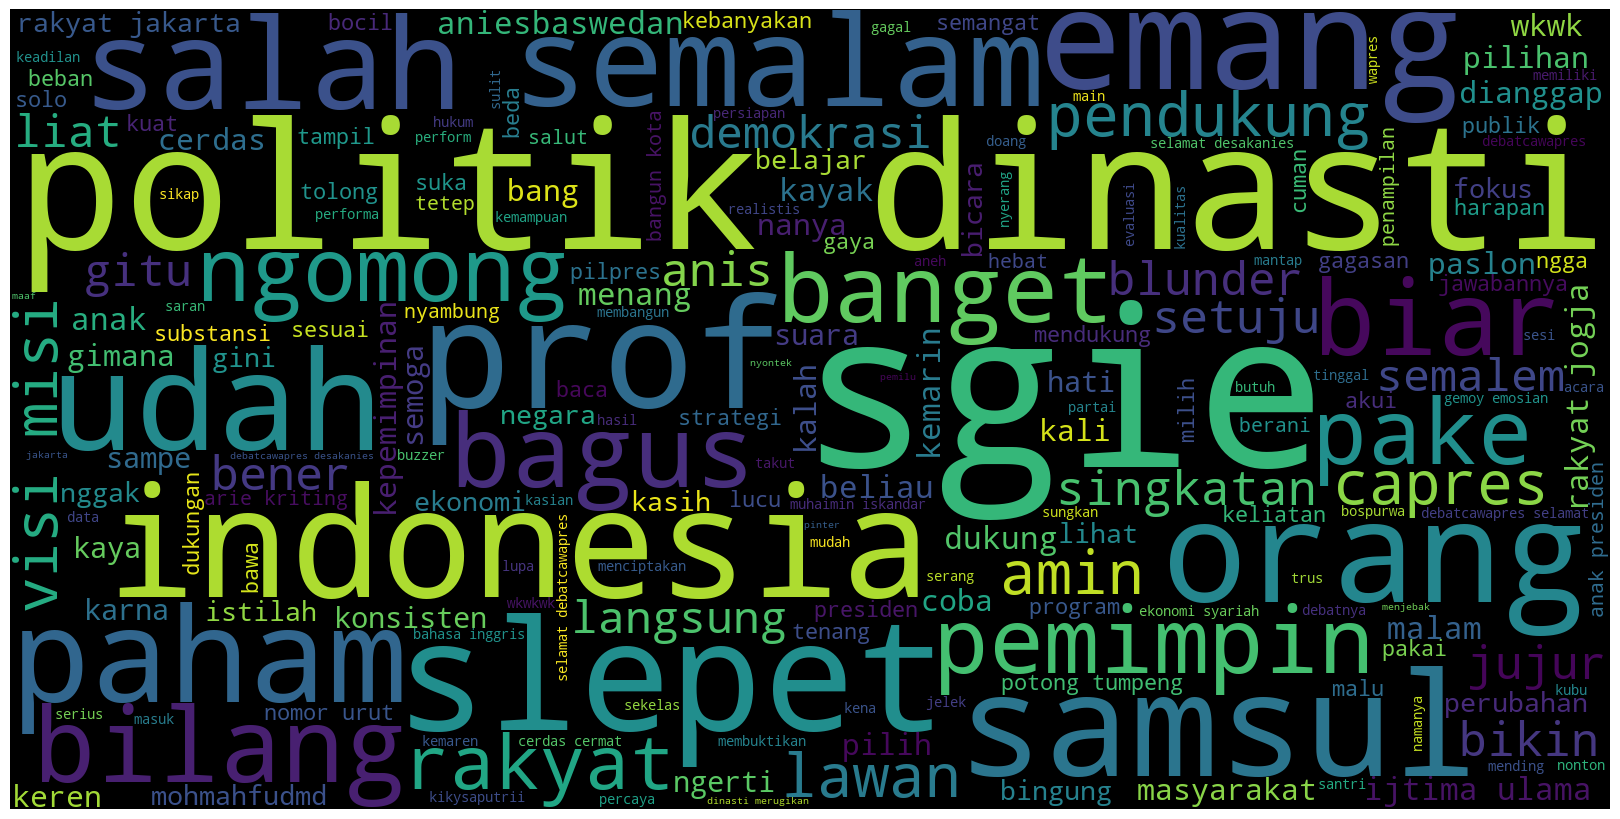

In [15]:
from wordcloud import WordCloud

# Mengambil kolom Review untuk melihat frekuensi kata
text_imin = imin_clean['twit process'].tolist() 

# Menggabungkan list dan lowercase pada semua kata
text_imin = ' '.join(text_imin).lower()

# Mendefinisikan WordCloud
wordcloud_imin = WordCloud(width = 1600, height = 800,
                      background_color ='black',
                      min_font_size = 10).generate(text_imin)

import matplotlib.pyplot as plt
# Plot gambar WordCloud

plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud_imin)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### WorldCloud gibran

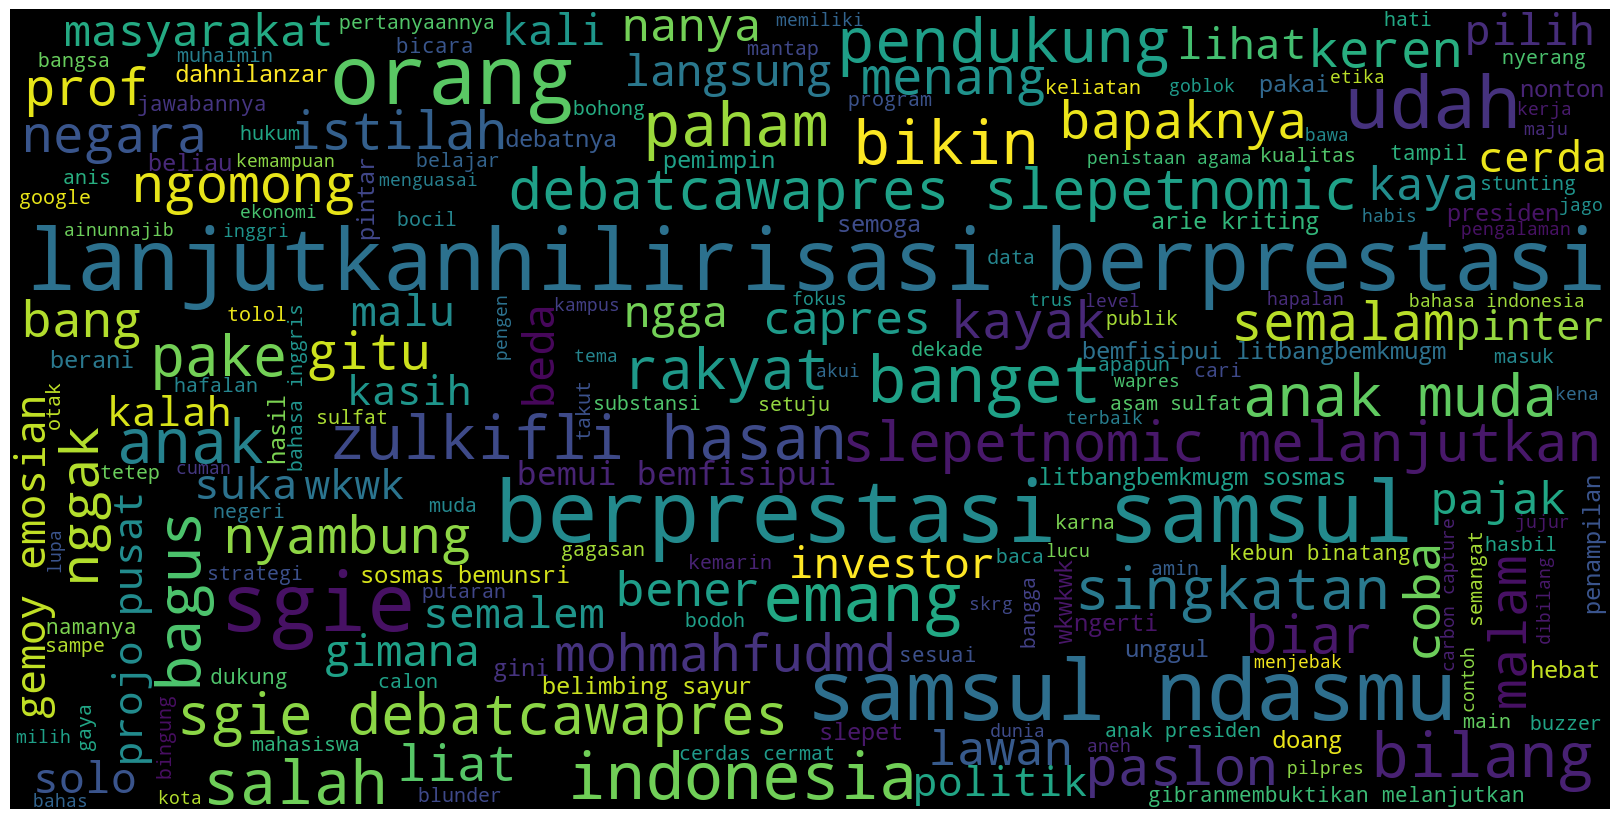

In [16]:

# Mengambil kolom Review untuk melihat frekuensi kata
text_gibran = gibran_clean['twit process'].tolist() 

# Menggabungkan list dan lowercase pada semua kata
text_gibran = ' '.join(text_gibran).lower()

# Mendefinisikan WordCloud
wordcloud_gibran = WordCloud(width = 1600, height = 800,
                      background_color ='black',
                      min_font_size = 10).generate(text_gibran)

import matplotlib.pyplot as plt
# Plot gambar WordCloud

plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud_gibran)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### WorldCloud mahfud

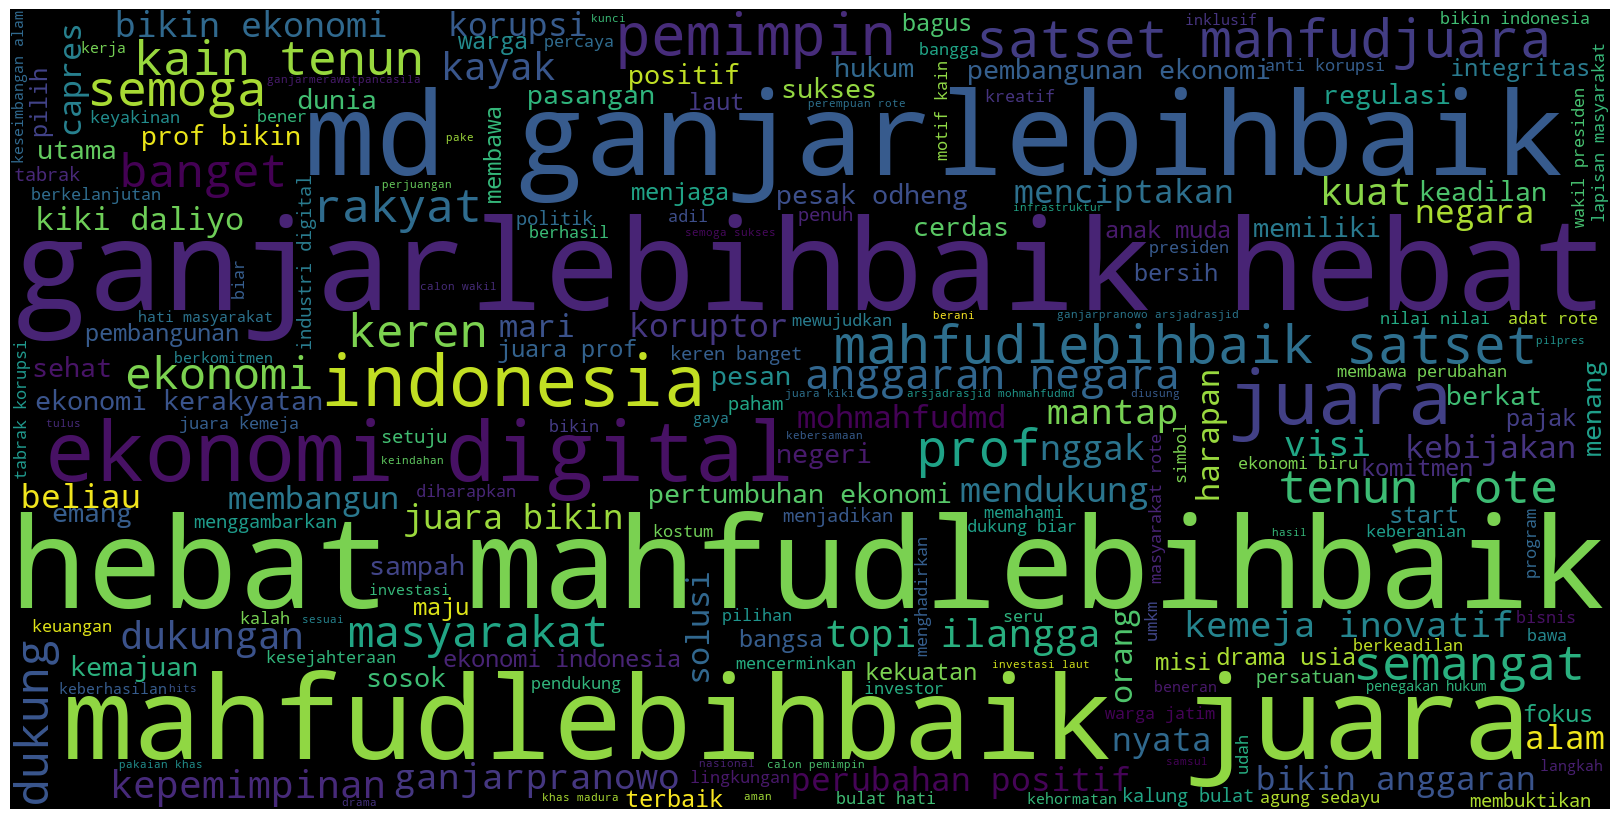

In [17]:

# Mengambil kolom Review untuk melihat frekuensi kata
text_mahfud = mahfud_clean['twit process'].tolist() 

# Menggabungkan list dan lowercase pada semua kata
text_mahfud = ' '.join(text_mahfud).lower()

# Mendefinisikan WordCloud
wordcloud_mahfud = WordCloud(width = 1600, height = 800,
                      background_color ='black',
                      min_font_size = 10).generate(text_mahfud)

import matplotlib.pyplot as plt
# Plot gambar WordCloud

plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud_mahfud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Sentiment analysis

## Modeling

In [18]:
from transformers import pipeline

pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"

nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

### Apply model imin

In [19]:
# Apply the sentiment analysis model to all reviews
imin_clean['result'] = imin_clean['twit process'].apply(lambda x: nlp(x))

# Split sentiment and probability from results
imin_clean['sentiment'] = imin_clean['result'].apply(lambda x: x[0]['label'])
imin_clean['proba'] = imin_clean['result'].apply(lambda x: x[0]['score'])

In [20]:
#show the first 10 data
pd.set_option('display.max_colwidth', None)

imin_clean.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,twit process,result,sentiment,proba
0,2023-12-23 12:41:18,1738540282319454565,@NasDem @cakimiNOW Cak imin gaada obat🥰,0,0,0,0,in,1723198028990074880,1738199509690466649,pikacualey,https://twitter.com/pikacualey/status/1738540282319454565,gaada obat,"[{'label': 'neutral', 'score': 0.8410311937332153}]",neutral,0.841031
1,2023-12-23 12:41:17,1738540278645170491,@cakimiNOW Next debat tanyain yg susah2 aja cak. Kali ini jangan anggap remeh. Bukan krn gibran pinter. Tapi antisipasi permainan bocah ini yg memang diset spt itu oleh timnya. Kasih dia yg susah2 biar ngebul tuh kepalanya. Cak imin matang pengalaman dan pengetahuan. Pasti bisa!,0,0,0,0,in,547856416,1738521412481196067,RidNgemil,https://twitter.com/RidNgemil/status/1738540278645170491,next tanyain susah kali anggap remeh pinter antisipasi permainan bocah diset timnya kasih susah biar ngebul kepalanya matang pengalaman pengetahuan,"[{'label': 'negative', 'score': 0.9791131615638733}]",negative,0.979113


### Apply model gibran

In [21]:
# Apply the sentiment analysis model to all reviews
gibran_clean['result'] = gibran_clean['twit process'].apply(lambda x: nlp(x))

# Split sentiment and probability from results
gibran_clean['sentiment'] = gibran_clean['result'].apply(lambda x: x[0]['label'])
gibran_clean['proba'] = gibran_clean['result'].apply(lambda x: x[0]['score'])

### Apply model mahfud

In [22]:

# apllying model to all review
mahfud_clean['result'] = mahfud_clean['twit process'].apply(lambda x:nlp(x))

# split sentiment and probabillity from results
mahfud_clean['sentiment'] = mahfud_clean['result'].apply(lambda x :(x[0]['label']))
mahfud_clean['proba'] = mahfud_clean['result'].apply(lambda x :(x[0]['score']))

# WorldCloud sentiment

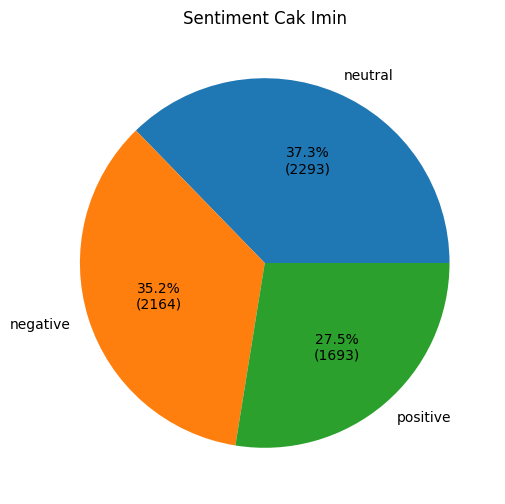

In [23]:
# hitung frekuensi sentimen cak imin
imin_sentimen = imin_clean['sentiment'].value_counts()

# Membuat plot
plt.figure(figsize=(6,6))
plt.pie(imin_sentimen, labels=imin_sentimen.index, 
        autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*sum(imin_sentimen))))
plt.title('Sentiment Cak Imin')
plt.show()

In [ ]:
imin_sentimen_negative = imin_clean[imin_clean['sentiment'] == 'negative']
imin_sentimen_negative

In [ ]:
imin_sentimen_positif = imin_clean[imin_clean['sentiment'] == 'positive']
imin_sentimen_positif

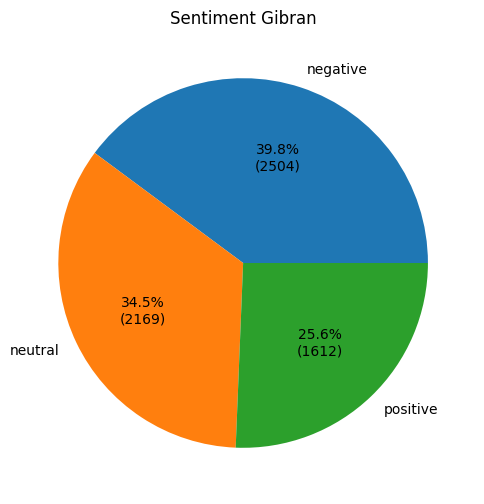

In [26]:
# hitung frekuensi sentimen gibran
gibran_sentimen = gibran_clean['sentiment'].value_counts()

# Membuat plot
plt.figure(figsize=(6,6))
plt.pie(gibran_sentimen, labels=gibran_sentimen.index, 
        autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*sum(gibran_sentimen))))
plt.title('Sentiment Gibran')
plt.show()

In [ ]:
gibran_sentimen

In [ ]:
gibran_sentimen_negatif = gibran_clean[gibran_clean['sentiment']=='negative']
gibran_sentimen_negatif

In [29]:
gibran_sentimen_positif = gibran_clean[gibran_clean['sentiment']=='positive']

In [ ]:
filtered_df = gibran_sentimen_positif[gibran_sentimen_positif['full_text'].str.contains('prof', case=False)]
filtered_df

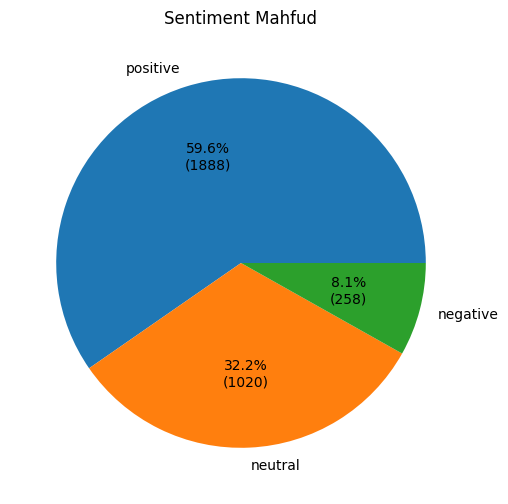

In [31]:
# hitung frekuensi sentimen mahfud
mahfud_sentimen = mahfud_clean['sentiment'].value_counts()

# Membuat plot
plt.figure(figsize=(6,6))
plt.pie(mahfud_sentimen, labels=mahfud_sentimen.index, 
        autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*sum(mahfud_sentimen))))
plt.title('Sentiment Mahfud')
plt.show()

In [ ]:
mahfud_sentimen

In [ ]:
mahfud_sentimen_negatif = mahfud_clean[mahfud_clean['sentiment']=='negative']
mahfud_sentimen_negatif

In [ ]:
mahfud_sentimen_positif = mahfud_clean[mahfud_clean['sentiment']=='positive']
mahfud_sentimen_positif

# Creating Bigram, Trigram Models, Dictionary, Corpus


## Cak imin topic

In [35]:
# split text in content_process into word
teks_imin = imin_clean['twit process']
teks_list_imin =  [i.split() for i in teks_imin]

In [36]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram_imin = Phrases(teks_list_imin, min_count=10)
trigram_imin = Phrases(bigram_imin[teks_list_imin])
for idx in range(len(teks_list_imin)):
    for token in bigram_imin[teks_list_imin[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            teks_list_imin[idx].append(token)
    for token in trigram_imin[teks_list_imin[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            teks_list_imin[idx].append(token)

In [37]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary_imin = corpora.Dictionary(teks_list_imin)
dictionary_imin.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).


In [38]:
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_imin = [dictionary_imin.doc2bow(doc) for doc in teks_list_imin]

print(len(doc_term_matrix_imin))
print(doc_term_matrix_imin[100])
tfidf_imin = models.TfidfModel(doc_term_matrix_imin) #build TF-IDF model
corpus_tfidf_imin = tfidf_imin[doc_term_matrix_imin]

6152
[(462, 1), (463, 1), (464, 1)]


In [39]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary_imin, corpus, texts, limit, start, step):
    coherence_values_imin = []
    model_list_imin = []
    for num_topics in range(start, limit, step):
        model_imin = LdaModel(corpus=corpus, id2word=dictionary_imin, num_topics=num_topics, iterations=100, random_state=42)
        model_list_imin.append(model_imin)
        coherencemodel_imin = CoherenceModel(model=model_imin, texts=texts, dictionary=dictionary_imin, coherence='c_v')
        coherence_values_imin.append(coherencemodel_imin.get_coherence())
        
    return model_list_imin, coherence_values_imin

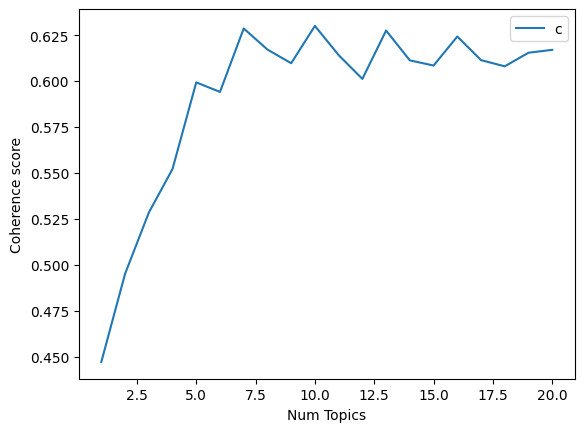

In [40]:
start=1
limit=21
step=1
model_list_imin, coherence_values_imin = compute_coherence_values(dictionary_imin, corpus=corpus_tfidf_imin, 
                                                        texts=teks_list_imin, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_imin)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [41]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_imin):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.447
Num Topics = 2  has Coherence Value of 0.495
Num Topics = 3  has Coherence Value of 0.528
Num Topics = 4  has Coherence Value of 0.552
Num Topics = 5  has Coherence Value of 0.599
Num Topics = 6  has Coherence Value of 0.594
Num Topics = 7  has Coherence Value of 0.629
Num Topics = 8  has Coherence Value of 0.617
Num Topics = 9  has Coherence Value of 0.61
Num Topics = 10  has Coherence Value of 0.63
Num Topics = 11  has Coherence Value of 0.614
Num Topics = 12  has Coherence Value of 0.601
Num Topics = 13  has Coherence Value of 0.627
Num Topics = 14  has Coherence Value of 0.611
Num Topics = 15  has Coherence Value of 0.608
Num Topics = 16  has Coherence Value of 0.624
Num Topics = 17  has Coherence Value of 0.611
Num Topics = 18  has Coherence Value of 0.608
Num Topics = 19  has Coherence Value of 0.615
Num Topics = 20  has Coherence Value of 0.617


In [62]:
model_imin = LdaModel(corpus=corpus_tfidf_imin, id2word=dictionary_imin, num_topics=10 , random_state=42) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model_imin.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.028*"demokrasi" + 0.022*"menatamasadepan_bersamaprabowogibran" + 0.015*"jilat" + 0.015*"situ" + 0.015*"jogja" + 0.014*"terbaik" + 0.013*"cocok" + 0.012*"sukses" + 0.012*"berubah" + 0.011*"kenal"
Topic: 1 Word: 0.024*"mental" + 0.019*"prof" + 0.018*"udah" + 0.013*"giliran" + 0.012*"efek" + 0.011*"semalem" + 0.011*"lakukan" + 0.010*"kaum" + 0.010*"netijen" + 0.010*"intinya"
Topic: 2 Word: 0.017*"sampean" + 0.013*"untung" + 0.013*"pakai_singkatan" + 0.013*"dukungan" + 0.013*"halu" + 0.012*"minus" + 0.012*"harapan" + 0.012*"parah" + 0.011*"dibalas" + 0.011*"sosmedkeras"
Topic: 3 Word: 0.032*"dinasti" + 0.025*"bahasa_inggris" + 0.023*"baca_teks" + 0.017*"aspirasi" + 0.014*"unggul" + 0.014*"sopan" + 0.013*"ketua_partai" + 0.013*"kasi" + 0.012*"adab" + 0.012*"moderator"
Topic: 4 Word: 0.019*"wakilnya" + 0.013*"pemahaman" + 0.013*"contekan" + 0.013*"tvonenews" + 0.012*"like" + 0.012*"trus" + 0.012*"bodoh" + 0.011*"setuju" + 0.011*"bawa" + 0.009*"dibahas"
Topic: 5 Word: 0.017*"

In [63]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()
#Topic Modeling Visualization
data_imin = pyLDAvis.gensim.prepare(model_imin, corpus_tfidf_imin, dictionary_imin)
# print(data)
pyLDAvis.save_html(data_imin, 'topic-modeling-imin.html')

## Gibran Topic

In [44]:
# split text in content_process into word
teks_gibran = gibran_clean['twit process']
teks_list_gibran =  [i.split() for i in teks_gibran]

In [45]:
#Create Bigram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram_gibran = Phrases(teks_list_gibran, min_count=10)
trigram_gibran = Phrases(bigram_gibran[teks_list_gibran])
for idx in range(len(teks_list_gibran)):
    for token in bigram_gibran[teks_list_gibran[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            teks_list_gibran[idx].append(token)
    for token in trigram_gibran[teks_list_gibran[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            teks_list_gibran[idx].append(token)

In [46]:
# Create a dictionary representation of the documents.
dictionary_gibran = corpora.Dictionary(teks_list_gibran)
dictionary_gibran.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).


In [47]:
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_gibran = [dictionary_gibran.doc2bow(doc) for doc in teks_list_gibran]

print(len(doc_term_matrix_gibran))
print(doc_term_matrix_gibran[100])
tfidf_gibran = models.TfidfModel(doc_term_matrix_gibran) #build TF-IDF model
corpus_tfidf_gibran = tfidf_gibran[doc_term_matrix_gibran]

6287
[(23, 1), (102, 1), (257, 1), (339, 1)]


In [48]:
#function to compute coherence values
def compute_coherence_values(dictionary_gibran, corpus, texts, limit, start, step):
    coherence_values_gibran = []
    model_list_gibran = []
    for num_topics in range(start, limit, step):
        model_gibran = LdaModel(corpus=corpus, id2word=dictionary_gibran, num_topics=num_topics, iterations=100, random_state=42)
        model_list_gibran.append(model_gibran)
        coherencemodel_gibran = CoherenceModel(model=model_gibran, texts=texts, dictionary=dictionary_gibran, coherence='c_v')
        coherence_values_gibran.append(coherencemodel_gibran.get_coherence())
        
    return model_list_gibran, coherence_values_gibran

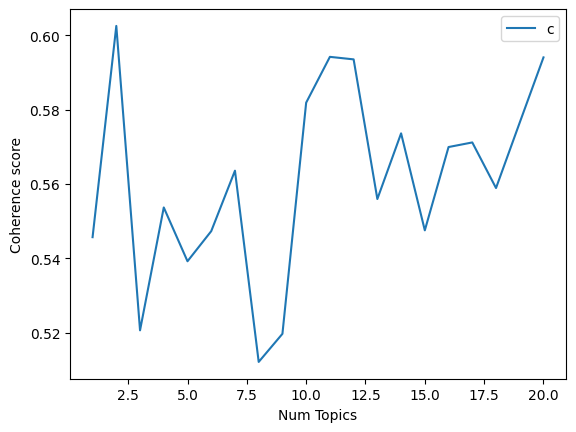

In [49]:
start=1
limit=21
step=1
model_list_gibran, coherence_values_gibran = compute_coherence_values(dictionary_gibran, corpus=corpus_tfidf_gibran, 
                                                        texts=teks_list_gibran, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_gibran)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [50]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_gibran):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.546
Num Topics = 2  has Coherence Value of 0.603
Num Topics = 3  has Coherence Value of 0.521
Num Topics = 4  has Coherence Value of 0.554
Num Topics = 5  has Coherence Value of 0.539
Num Topics = 6  has Coherence Value of 0.547
Num Topics = 7  has Coherence Value of 0.564
Num Topics = 8  has Coherence Value of 0.512
Num Topics = 9  has Coherence Value of 0.52
Num Topics = 10  has Coherence Value of 0.582
Num Topics = 11  has Coherence Value of 0.594
Num Topics = 12  has Coherence Value of 0.594
Num Topics = 13  has Coherence Value of 0.556
Num Topics = 14  has Coherence Value of 0.574
Num Topics = 15  has Coherence Value of 0.548
Num Topics = 16  has Coherence Value of 0.57
Num Topics = 17  has Coherence Value of 0.571
Num Topics = 18  has Coherence Value of 0.559
Num Topics = 19  has Coherence Value of 0.577
Num Topics = 20  has Coherence Value of 0.594


In [51]:
model_gibran = LdaModel(corpus=corpus_tfidf_gibran, id2word=dictionary_gibran, num_topics=2, random_state=42) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model_gibran.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.005*"bener" + 0.005*"baca" + 0.005*"samsul_ndasmu" + 0.005*"singkatan" + 0.005*"sgie" + 0.004*"asam_sulfat" + 0.004*"bilang" + 0.004*"berprestasi" + 0.004*"samsul" + 0.004*"bagus"
Topic: 1 Word: 0.028*"samsul_ndasmu" + 0.014*"ndasmu" + 0.014*"lanjutkanhilirisasi_berprestasi_samsul_ndasmu" + 0.014*"lanjutkanhilirisasi" + 0.014*"lanjutkanhilirisasi_berprestasi" + 0.014*"samsul" + 0.013*"berprestasi" + 0.010*"zulkifli_hasan" + 0.009*"hasan" + 0.009*"agama"


In [52]:
#Topic Modeling Visualization
data_gibran = pyLDAvis.gensim.prepare(model_gibran, corpus_tfidf_gibran, dictionary_gibran)
# print(data)
pyLDAvis.save_html(data_gibran, 'topic-modeling-gibran.html')

## Mahfud topic

In [53]:
# split text in content_process into word
teks_mahfud = mahfud_clean['twit process']
teks_list_mahfud =  [i.split() for i in teks_mahfud]

In [54]:
#Create Bigram & Trigram Models 
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram_mahfud = Phrases(teks_list_mahfud, min_count=10)
trigram_mahfud = Phrases(bigram_mahfud[teks_list_mahfud])
for idx in range(len(teks_list_mahfud)):
    for token in bigram_mahfud[teks_list_mahfud[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            teks_list_mahfud[idx].append(token)
    for token in trigram_mahfud[teks_list_mahfud[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            teks_list_mahfud[idx].append(token)

In [55]:
# Create a dictionary representation of the documents.
dictionary_mahfud = corpora.Dictionary(teks_list_mahfud)
dictionary_mahfud.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).


In [56]:
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix_mahfud = [dictionary_mahfud.doc2bow(doc) for doc in teks_list_mahfud]

print(len(doc_term_matrix_mahfud))
print(doc_term_matrix_mahfud[100])
tfidf_mahfud = models.TfidfModel(doc_term_matrix_mahfud) #build TF-IDF model
corpus_tfidf_mahfud = tfidf_mahfud[doc_term_matrix_mahfud]

3167
[]


In [57]:
#function to compute coherence values
def compute_coherence_values(dictionary_mahfud, corpus, texts, limit, start, step):
    coherence_values_mahfud = []
    model_list_mahfud = []
    for num_topics in range(start, limit, step):
        model_mahfud = LdaModel(corpus=corpus, id2word=dictionary_mahfud, num_topics=num_topics, iterations=100, random_state=42)
        model_list_mahfud.append(model_mahfud)
        coherencemodel_mahfud = CoherenceModel(model=model_mahfud, texts=texts, dictionary=dictionary_mahfud, coherence='c_v')
        coherence_values_mahfud.append(coherencemodel_mahfud.get_coherence())
        
    return model_list_mahfud, coherence_values_mahfud

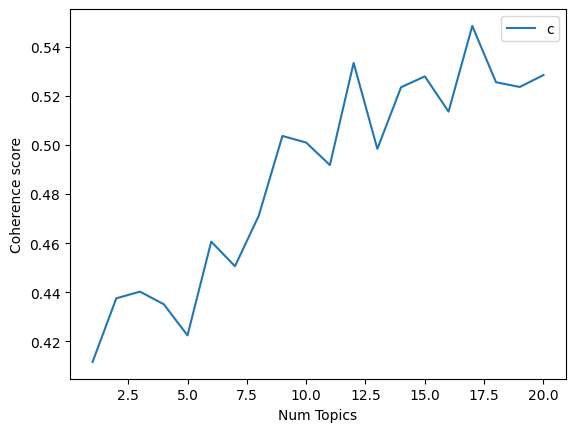

In [58]:
start=1
limit=21
step=1
model_list_mahfud, coherence_values_mahfud= compute_coherence_values(dictionary_mahfud, corpus=corpus_tfidf_mahfud, 
                                                        texts=teks_list_mahfud, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values_mahfud)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [59]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_mahfud):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 1  has Coherence Value of 0.412
Num Topics = 2  has Coherence Value of 0.437
Num Topics = 3  has Coherence Value of 0.44
Num Topics = 4  has Coherence Value of 0.435
Num Topics = 5  has Coherence Value of 0.422
Num Topics = 6  has Coherence Value of 0.461
Num Topics = 7  has Coherence Value of 0.451
Num Topics = 8  has Coherence Value of 0.471
Num Topics = 9  has Coherence Value of 0.504
Num Topics = 10  has Coherence Value of 0.501
Num Topics = 11  has Coherence Value of 0.492
Num Topics = 12  has Coherence Value of 0.533
Num Topics = 13  has Coherence Value of 0.498
Num Topics = 14  has Coherence Value of 0.524
Num Topics = 15  has Coherence Value of 0.528
Num Topics = 16  has Coherence Value of 0.514
Num Topics = 17  has Coherence Value of 0.549
Num Topics = 18  has Coherence Value of 0.526
Num Topics = 19  has Coherence Value of 0.524
Num Topics = 20  has Coherence Value of 0.529


In [60]:
model_mahfud = LdaModel(corpus=corpus_tfidf_mahfud, id2word=dictionary_mahfud, num_topics=17, random_state=42) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model_mahfud.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.049*"anti_korupsi" + 0.034*"dukung" + 0.021*"anti" + 0.020*"konektivitas" + 0.017*"mendukung" + 0.014*"bersinar" + 0.014*"pesak_odheng" + 0.013*"berani" + 0.013*"koruptor" + 0.012*"jalan"
Topic: 1 Word: 0.032*"korupsi" + 0.029*"warga_jatim" + 0.020*"satset" + 0.020*"bersih" + 0.020*"ganjarlebihbaik_hebat" + 0.020*"mahfudjuara" + 0.020*"mahfudlebihbaik_satset" + 0.020*"ganjarlebihbaik_hebat_mahfudlebihbaik_satset" + 0.019*"ganjarpranowo" + 0.019*"keuangan"
Topic: 2 Word: 0.032*"tabrak" + 0.029*"koruptor" + 0.021*"suara" + 0.020*"ganjarmahfud" + 0.016*"pilihan" + 0.016*"rote_mencerminkan" + 0.014*"solutif" + 0.013*"membawa_semangat" + 0.013*"bermanfaat" + 0.012*"hidup"
Topic: 3 Word: 0.037*"tabrak_koruptor" + 0.027*"kalung_bulat" + 0.026*"hati_masyarakat" + 0.024*"rakyat" + 0.022*"tabrak" + 0.016*"dunia" + 0.016*"korupsi" + 0.015*"kalung" + 0.015*"bulat" + 0.013*"koruptor"
Topic: 4 Word: 0.029*"bikin_anggaran" + 0.026*"made_indonesia" + 0.026*"terima_kasih" + 0.026*"terb

In [61]:
#Topic Modeling Visualization
data_mahfud = pyLDAvis.gensim.prepare(model_mahfud, corpus_tfidf_mahfud, dictionary_mahfud)
# print(data)
pyLDAvis.save_html(data_mahfud, 'topic-modeling-mahfud.html')